14 March 2025 8 AM

C:\Users\syamp\AppData\Local\Temp\ipykernel_14120\1159542777.py:16: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


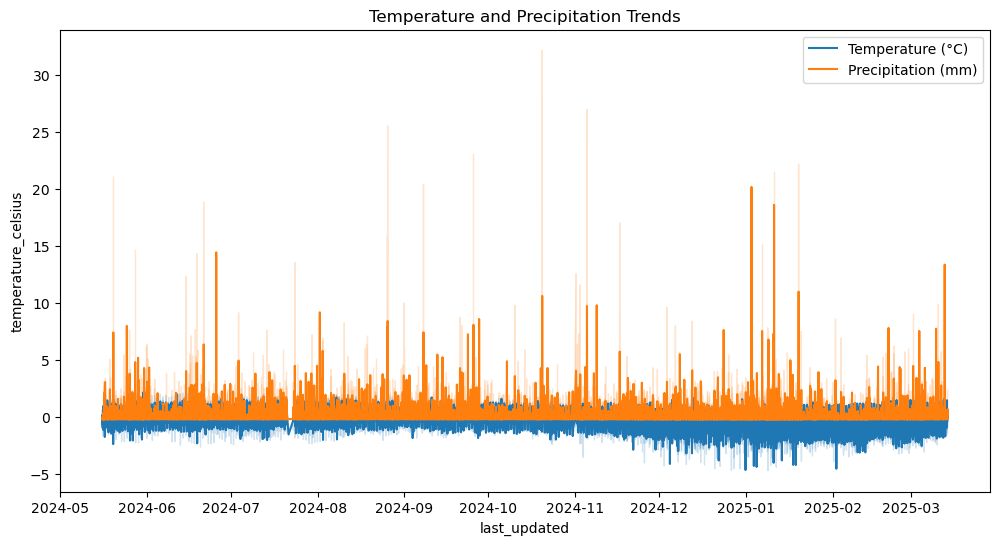

C:\Users\syamp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\syamp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\syamp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\syamp\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\syamp\anaconda3\Lib\site-

MAE: 0.9387838553413169, MSE: 1.3189685172323737, RMSE: 1.1484635463228137


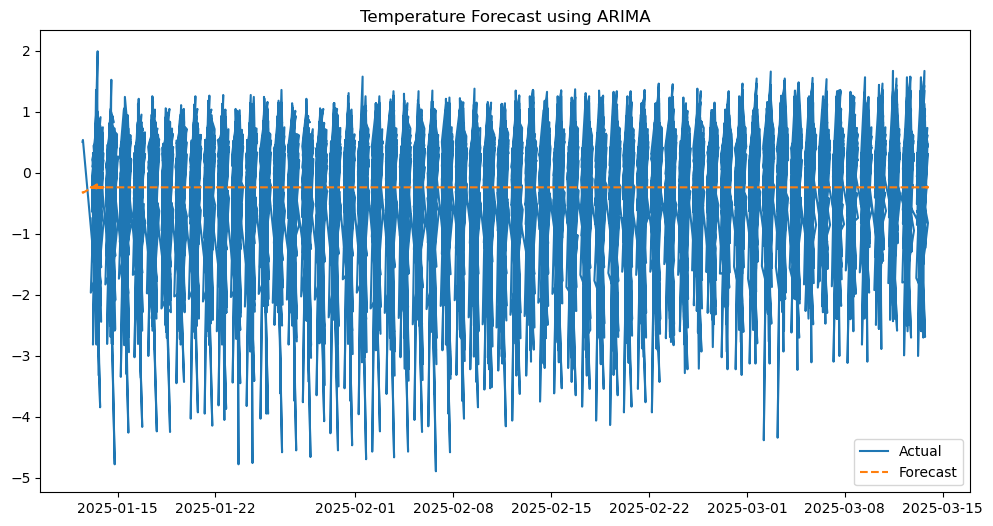

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Load dataset
df = pd.read_csv('GlobalWeatherRepository.csv', parse_dates=['last_updated']) # last_updated -> datetime format
df.set_index('last_updated', inplace=True) # setting the column as index

# Data Cleaning & Preprocessing
# Handling missing values
df.fillna(method='ffill', inplace=True) # ffill replaces the null value with the previous row value

# Normalizing numerical features
scaler = StandardScaler() # standardizing data: mean=0 and standard deviation=1
numeric_cols = ['temperature_celsius', 'precip_mm']
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x=df.index, y='temperature_celsius', label='Temperature (°C)')
sns.lineplot(data=df, x=df.index, y='precip_mm', label='Precipitation (mm)') # line plot
plt.legend()
plt.title('Temperature and Precipitation Trends')
plt.show() # plots temperature and precipitation over time

# Train-Test Split
train_size = int(len(df) * 0.8)
train, test = df[:train_size], df[train_size:] # 80-20 split

# ARIMA Model - AutoRegressive Integrated Moving Average
# 5 observations for autoregression(p=5), differencing is applied once to make the data stationary(d=1), no moving average component(q=0)
model = ARIMA(train['temperature_celsius'], order=(5,1,0))
model_fit = model.fit() # fits the ARIMA model

# Forecasting
forecast = model_fit.forecast(steps=len(test)) # testing - predicts temperature for the test set

# Evaluation
mae = mean_absolute_error(test['temperature_celsius'], forecast) # Mean Absolute Error
mse = mean_squared_error(test['temperature_celsius'], forecast) # Mean Squared Error
rmse = np.sqrt(mse) # Root Mean Squared Error

print(f'MAE: {mae}, MSE: {mse}, RMSE: {rmse}') # prints error metrics

# Plot Forecast
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['temperature_celsius'], label='Actual')
plt.plot(test.index, forecast, label='Forecast', linestyle='dashed')
plt.legend()
plt.title('Temperature Forecast using ARIMA')
plt.show() # plots actual vs predicted values for temperature.
